In [1]:
import re

from tqdm import tqdm

import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from nltk.tokenize import TweetTokenizer
%matplotlib inline

# Load Data

In [2]:
data = pd.read_csv('./data/train.csv')
print(data.shape)
data.head()

(159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


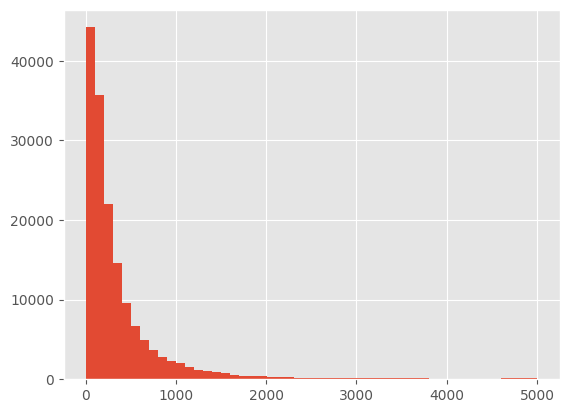

In [3]:
plt.hist(data['comment_text'].apply(len), bins=50);  # hist of len in symbols

# Tokenizing

In [4]:
# simple example
def tokenizer(text):
    return re.findall(r'[\w]+', text)

In [5]:
tokenizer(data['comment_text'][7])

['Your',
 'vandalism',
 'to',
 'the',
 'Matt',
 'Shirvington',
 'article',
 'has',
 'been',
 'reverted',
 'Please',
 'don',
 't',
 'do',
 'it',
 'again',
 'or',
 'you',
 'will',
 'be',
 'banned']

In [6]:
tokenizer = TweetTokenizer()
tokenizer.tokenize(data['comment_text'][7].lower())

['your',
 'vandalism',
 'to',
 'the',
 'matt',
 'shirvington',
 'article',
 'has',
 'been',
 'reverted',
 '.',
 'please',
 "don't",
 'do',
 'it',
 'again',
 ',',
 'or',
 'you',
 'will',
 'be',
 'banned',
 '.']

In [7]:
tokenized_corpus = [tokenizer.tokenize(text.lower()) for text in tqdm(data['comment_text'].values)]  # lowercase
len(tokenized_corpus)

100%|████████████████████████████████████████████████████████████████████████| 159571/159571 [00:50<00:00, 3172.89it/s]


159571

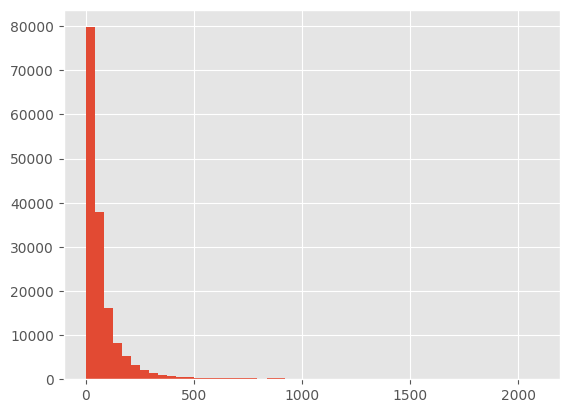

In [8]:
plt.hist(list(map(len, tokenized_corpus)), bins=50);  # hist of len in tokens

# Lemmatization/stemming

In [9]:
# from pymorphy2 import MorphAnalyzer  # for russian

# cache = {}
# lemmatizer = MorphAnalyzer()

# def lemmatize(word):
#     if word in cache.keys():
#         return cache[word]
#     else:
#         lemmatized = lemmatizer.parse(word)[0].normal_form
#         cache[word] = lemmatized
#         return lemmatized

# lemmatize('прошел')

In [10]:
# import nltk
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer

# cache = {}
# lemmatizer = WordNetLemmatizer()

# def lemmatize(word):
#     if word in cache.keys():
#         return cache[word]
#     else:
#         lemmatized = lemmatizer.lemmatize(word, pos='v')
#         cache[word] = lemmatized
#         return lemmatized

# lemmatize('went')  # requires pos

In [11]:
# import spacy

# nlp = spacy.load('en_core_web_sm')
# doc = nlp('Some text with loaded buns and so on...')
# print([token.lemma_ for token in doc])

# # it is not that useful in real cases, because it takes time

# preprocessed_corpus = [[token.lemma_ for token in nlp(text)] for text in tqdm(data['comment_text'].values, position=0, leave=True)]

In [12]:
# for english texts it is ok to use stemmer instead of lemmatizer
from nltk.stem.snowball import SnowballStemmer

cache = {}
stemmer = SnowballStemmer(language='english')

def stem(word):
    if word in cache.keys():
        return cache[word]
    else:
        stemmed = stemmer.stem(word)
        cache[word] = stemmed
        return stemmed

print(stem('loaded'))
preprocessed_corpus = [[stem(word) for word in tokenized_text] for tokenized_text in tqdm(tokenized_corpus)]

load


100%|███████████████████████████████████████████████████████████████████████| 159571/159571 [00:05<00:00, 28483.77it/s]


# Look at statistics + stopwords

In [13]:
from collections import Counter

counter = Counter()
for text in preprocessed_corpus:
    for word in text:
        counter[word] += 1

In [14]:
counter.most_common(10)  # typically garbage

[('.', 545636),
 ('the', 496136),
 (',', 472129),
 ('"', 392047),
 ('to', 296973),
 ('of', 224072),
 ('and', 223665),
 ('a', 215343),
 ('you', 206018),
 ('i', 204703)]

In [15]:
len(counter)

188896

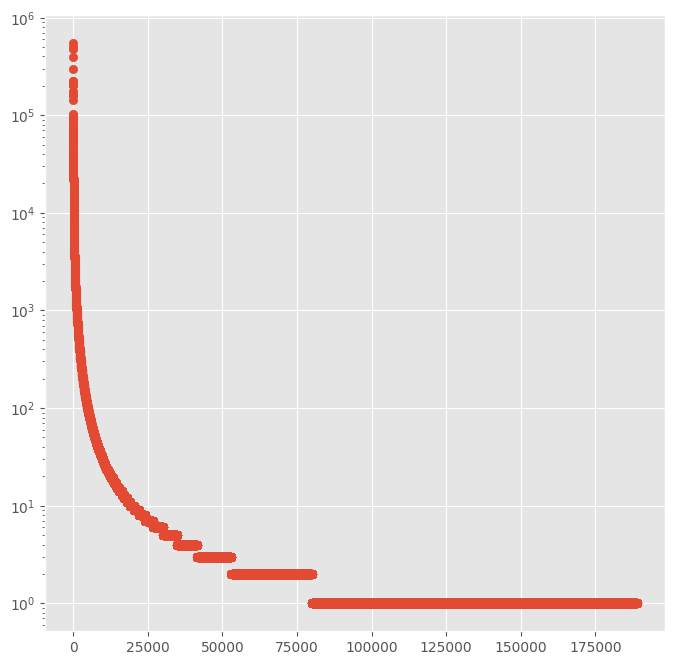

In [16]:
# https://en.wikipedia.org/wiki/Zipf%27s_law
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(range(len(counter)), sorted(counter.values(), reverse=True))

# Set logarithmic scale on the y variable
ax.set_yscale("log");

In [17]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Роман\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
stoplist += ['"', '.', ',', "'"]
stoplist

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
preprocessed_corpus = [[word for word in text if word not in stoplist] for text in tqdm(preprocessed_corpus)]

100%|████████████████████████████████████████████████████████████████████████| 159571/159571 [00:18<00:00, 8440.41it/s]


In [20]:
counter = Counter()

for text in preprocessed_corpus:
    for word in text:
        counter[word] += 1

counter.most_common(10)

[(')', 86535),
 ('(', 84421),
 ('articl', 73879),
 ('?', 68013),
 (':', 66582),
 ('!', 64200),
 ('page', 56721),
 ('wikipedia', 45818),
 ('edit', 40832),
 ('talk', 39332)]

In [21]:
# let's count amount of docs where word occurs
counter = Counter()
doc_n = 0

for text in preprocessed_corpus:
    doc_n += 1
    unique_words = set(text)
    for word in unique_words:
        counter[word] += 1

counter.most_common(10)

[(')', 46952),
 ('(', 46127),
 ('?', 39619),
 ('articl', 37453),
 (':', 33323),
 ('page', 31435),
 ('talk', 28433),
 ('wikipedia', 25745),
 ('edit', 24304),
 ('!', 22807)]

# Building vocab

In [22]:
min_count = 5  # min number of texts where word occured
max_doc_freq = 0.95  # max word/document ratio

print(len(counter))
token2id = {word: count for word, count in counter.items() if count >= min_count and count/doc_n <= max_doc_freq}
print(len(token2id))

token_counts = sorted(token2id.items(), key=lambda x: x[1], reverse=True)
token2id = {word: i for i, (word, _) in enumerate(token_counts)}

188737
28614


In [23]:
len(token2id)

28614

In [40]:
document_freq = [word_cnt/doc_n for _, word_cnt in token_counts]
document_freq[:5]

[0.2942389281260379,
 0.28906881576226257,
 0.24828446271565635,
 0.23471056770967155,
 0.20882867187646878]

# Vectorizing texts

In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [64]:
count_vect = CountVectorizer(
    lowercase=False,
    tokenizer=lambda x: x,
    vocabulary=token2id
)

In [65]:
vectorized_corpus = count_vect.fit_transform(preprocessed_corpus)

D:\Dev\jupyter\projects\Data Science\venvs\venv_yandex_nlp\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [66]:
vectorized_corpus[0].toarray()

array([[0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [69]:
np.where(vectorized_corpus[100].toarray() != 0)[1]

array([   0,    1,    8,   37,   98,  133,  993, 2858, 2971], dtype=int64)

In [42]:
id2token = {i: token for token, i in token2id.items()}

In [70]:
# just for checking expected behaviour of countvectorizer, takes time
row_i = 0
token_i = 2
print(preprocessed_corpus[row_i].count(id2token[token_i]), vectorized_corpus[row_i].toarray()[0][token_i])

for row_i in tqdm(range(100, 200)):
    check_row = vectorized_corpus[row_i].toarray()[0]
    check_text = preprocessed_corpus[row_i]
    for i, elem in enumerate(check_row):
        assert elem == check_text.count(id2token[i]), f'{elem}, {id2token[i]}, {check_text.count(id2token[i])}'

1 1


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 51.45it/s]


In [27]:
tfidf_transf = TfidfTransformer()

In [28]:
tfidf_corpus = tfidf_transf.fit_transform(vectorized_corpus)

# LSA

In [29]:
from sklearn.decomposition import TruncatedSVD

In [30]:
svd = TruncatedSVD(n_components=10)
svd.fit(tfidf_corpus)

TruncatedSVD(n_components=10)

In [31]:
terms = count_vect.get_feature_names_out()

for index, component in enumerate(svd.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:5]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['page', 'articl', ')', '!', '?']
Topic 1:  ['!', '?', 'fuck', 'thank', '...']
Topic 2:  ['edit', 'page', 'pleas', 'vandal', 'block']
Topic 3:  ['?', 'edit', 'block', 'vandal', 'continu']
Topic 4:  [')', '(', 'talk', 'edit', 'block']
Topic 5:  ['=', '|', '?', ':', '}']
Topic 6:  ['?', 'talk', 'page', 'imag', '(']
Topic 7:  ['thank', 'welcom', 'test', 'use', 'page']
Topic 8:  ['imag', ':', 'use', 'copyright', 'upload']
Topic 9:  ['thank', ')', '(', '=', 'test']


# Clustering

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:
subset = np.random.choice(tfidf_corpus.shape[0], replace=False, size=int(tfidf_corpus.shape[0]*0.1))
subset = tfidf_corpus[subset]

In [34]:
n_clusters_list = range(2, 25)
scores = []
sulhouettes = []

for n_clusters in tqdm(n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(subset)
    labels = kmeans.predict(subset)
    scores.append(kmeans.inertia_)
    sulhouettes.append(silhouette_score(subset, labels))

  0%|                                                                                           | 0/23 [00:00<?, ?it/s]D:\Dev\jupyter\projects\Data Science\venvs\venv_yandex_nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  4%|███▌                                                                               | 1/23 [00:22<08:20, 22.77s/it]D:\Dev\jupyter\projects\Data Science\venvs\venv_yandex_nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  9%|███████▏                                                                           | 2/23 [00:45<08:01, 22.95s/it]D:\Dev\jupyter\projects\D

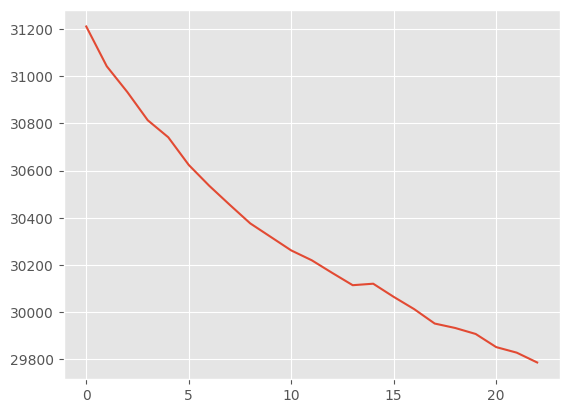

In [35]:
plt.plot(n_clusters_list, scores)

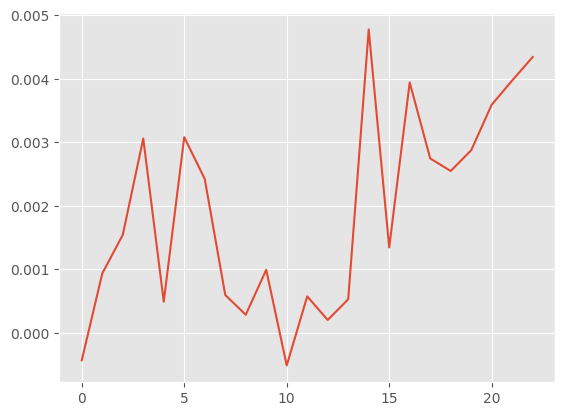

In [36]:
plt.plot(n_clusters_list, sulhouettes)

In [72]:
kmeans = KMeans(n_clusters=14)
kmeans.fit(tfidf_corpus)

D:\Dev\jupyter\projects\Data Science\venvs\venv_yandex_nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=14)

In [73]:
labels = kmeans.predict(tfidf_corpus)

In [74]:
counters = [Counter() for _ in range(14)]

for i, text in tqdm(enumerate(preprocessed_corpus)):
    label = labels[i]
    for word in text:
        counters[label][word] += 1

for i, counter in enumerate(counters):
    print(f"Cluster {i}")
    print(counter.most_common(5))

159571it [00:01, 92992.69it/s]

Cluster 0
[('pleas', 1515), ('test', 1390), ('wikipedia', 1234), ('sandbox', 1169), ('use', 1133)]
Cluster 1
[('=', 17060), ('|', 8179), (':', 5979), (';', 3683), ('•', 2694)]
Cluster 2
[('thank', 7172), ('!', 1836), (')', 1135), ('page', 904), ('talk', 852)]
Cluster 3
[('...', 9693), ('?', 2002), (')', 1775), ('(', 1661), ('!', 1469)]
Cluster 4
[('imag', 10464), ('use', 5541), (':', 4553), ('copyright', 3266), ('page', 2892)]
Cluster 5
[(')', 42807), ('(', 41466), (':', 8723), ('talk', 7032), ('?', 6867)]
Cluster 6
[('?', 13026), (')', 12708), ('(', 12380), ('-', 12158), (':', 11892)]
Cluster 7
[('?', 27918), ('whi', 4377), ('articl', 2385), ('page', 2134), (')', 2095)]
Cluster 8
[('articl', 41116), ('sourc', 12616), (')', 12553), ('(', 12209), ('wikipedia', 10814)]
Cluster 9
[('!', 36407), ('fuck', 5133), ('?', 2869), ('wikipedia', 1832), ('go', 1789)]
Cluster 10
[('edit', 4717), ('block', 4091), ('vandal', 2568), ('pleas', 2411), ('continu', 2036)]
Cluster 11
[(':', 17543), ('page',

# Word2vec

In [75]:
%%time
w2v = Word2Vec(preprocessed_corpus, min_count=min_count, vector_size=100, epochs=5, window=7, negative=20)
w2v.build_vocab(preprocessed_corpus)

w2v.train(preprocessed_corpus, total_examples=w2v.corpus_count, epochs=w2v.epochs)

CPU times: total: 3min 27s
Wall time: 1min 11s


(27968431, 31647825)

In [86]:
w2v_vectors = w2v.wv
w2v_vectors.most_similar('user')

[('editor', 0.6294787526130676),
 ('admin', 0.5670689940452576),
 ('sockpuppet', 0.552596926689148),
 ('anon', 0.5353742241859436),
 ('userpag', 0.5353530645370483),
 ('account', 0.4989020526409149),
 ('administr', 0.4910821318626404),
 ('harass', 0.4860386550426483),
 ('wikipedia', 0.47863471508026123),
 ('ip', 0.4766395390033722)]

In [87]:
vectorized_texts = []

for text in tqdm(preprocessed_corpus):
    text_vectors = np.zeros((100))
    n_words = len(text)
    for word in text:
        try:
            text_vectors += w2v_vectors[word]
        except KeyError:
            pass

    vectorized_texts.append(text_vectors/(n_words+1))
vectorized_texts = np.array(vectorized_texts)

100%|███████████████████████████████████████████████████████████████████████| 159571/159571 [00:12<00:00, 12729.60it/s]


In [88]:
vectorized_texts.shape

(159571, 100)

In [89]:
# normalize rows
vectorized_texts = vectorized_texts / (np.linalg.norm(vectorized_texts, axis=1, keepdims=True) + 1e-6)

In [90]:
subset = np.random.choice(vectorized_texts.shape[0], replace=False, size=int(vectorized_texts.shape[0]*0.1))
subset = vectorized_texts[subset]

In [91]:
n_clusters_list = range(2, 25)
scores = []
sulhouettes = []

for n_clusters in tqdm(n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(subset)
    labels = kmeans.predict(subset)
    scores.append(kmeans.inertia_)
    sulhouettes.append(silhouette_score(subset, labels))

  0%|                                                                                           | 0/23 [00:00<?, ?it/s]D:\Dev\jupyter\projects\Data Science\venvs\venv_yandex_nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  4%|███▌                                                                               | 1/23 [00:02<00:59,  2.69s/it]D:\Dev\jupyter\projects\Data Science\venvs\venv_yandex_nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  9%|███████▏                                                                           | 2/23 [00:05<00:56,  2.67s/it]D:\Dev\jupyter\projects\D

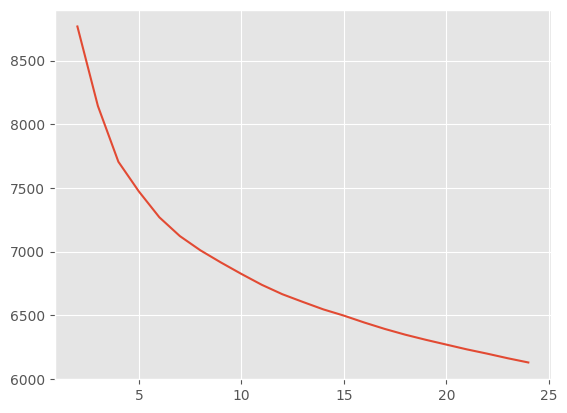

In [94]:
plt.plot(n_clusters_list, scores)

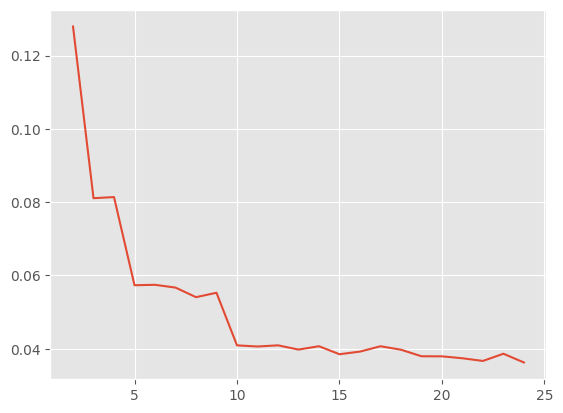

In [95]:
plt.plot(n_clusters_list, sulhouettes)

In [96]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(vectorized_texts)

D:\Dev\jupyter\projects\Data Science\venvs\venv_yandex_nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [97]:
labels = kmeans.predict(vectorized_texts)

In [98]:
counters = [Counter() for _ in range(4)]

for i, text in tqdm(enumerate(preprocessed_corpus)):
    label = labels[i]
    for word in text:
        counters[label][word] += 1

for i, counter in enumerate(counters):
    print(f"Cluster {i}")
    print(counter.most_common(5))

159571it [00:01, 96702.80it/s]

Cluster 0
[(')', 19377), ('(', 19216), (':', 11531), ('=', 9863), ('|', 8192)]
Cluster 1
[('!', 39751), ('?', 15639), ('fuck', 12259), ('...', 5716), ('like', 5566)]
Cluster 2
[('page', 38348), (':', 30625), ('articl', 29387), ('edit', 27252), ('wikipedia', 26565)]
Cluster 3
[(')', 41719), ('articl', 40696), ('(', 40533), ('?', 34944), (':', 22639)]
